# Hypothesis testing in python

https://app.datacamp.com/learn/courses/hypothesis-testing-in-python



## Intro to hypothesis testing

https://campus.datacamp.com/courses/hypothesis-testing-in-python/introduction-to-hypothesis-testing-efc8374a-68af-4cda-9b43-3e28fa6c65c0?ex=1

* stack overflow example 

* hypothesis - mean annual compensation of the population of data scientists is 110,000
* `mean_comp_samp = stack_overflow['converted_comp'].mean()` = 119575
* Is the difference between point sample and pop mean meaningfully different?
* To answer - need to generate a bootstrap distribution of sample means: 

```python
import numpy as np

# step 3 - repeat steps 1 adn 2 many times, appending to a list
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
        # step 2 calculate point estimate
        np.mean(
            # step 1 resample
            stack_overflow.sample(frac=1, replace = True)['converted_comp']
        )
    )

```

* `std_error = np.std(so_boot_distn, ddof=1)` = 5607
* z-scores 
  * standardised value = (value - mean)/standard deviation
  * $z = (sample stat - hypoth param value)/standard error$

* `mean_comp_hyp = 110000`
* `std_error = 5607.9976`
* `z-score = 1.7073`

* is this big or small? 
* hypothesis testing - to determine if sample statistic is close or far from expected statistic
* z-distribution - standard normal distribution with mean = 0 and standard deviation = 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
late_shipments = pd.read_feather('late_shipments.feather')

In [3]:
# Print the late_shipments dataset
print(late_shipments)

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late']=='Yes').mean()

# Print the results
print(late_prop_samp)

          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

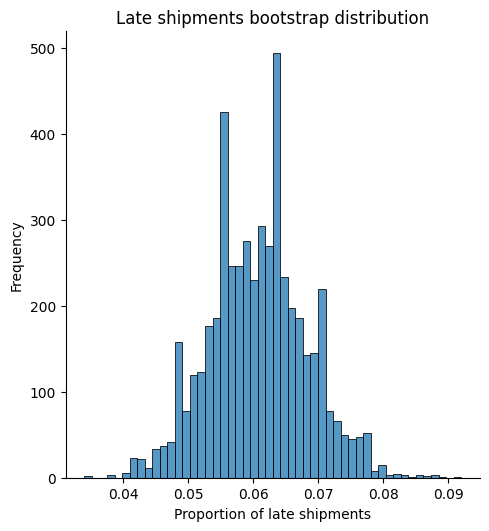

In [5]:
# bootstrap distribution
late_shipments_boot_distn = []
for i in range(5000):
    late_shipments_boot_distn.append(
        (late_shipments.sample(frac=1, replace=True)['late']=='Yes').mean()
    )

# Plot the bootstrap distribution
sns.displot(late_shipments_boot_distn, kde=False)
plt.title('Late shipments bootstrap distribution')
plt.xlabel('Proportion of late shipments')
plt.ylabel('Frequency')
plt.show()



In [6]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error

# Print z_score
print(z_score)

0.13329515405762127


# p=value hypothesis

* hypothesis - statement about an unknown population parameter
* hypothesis test:
  * null hypothesis = H0 - existing idea
  * alternative hypothesis = H1 - new challenger idea

* Assume null hypothesis is true
* Only change mind if there is enough evidence to reject the null hypothesis
* hypothesis tests - check if sample statistics lie in the tails of the null distribution:
  * alternative *different from* null -> two-tailed
  * alternative *greater than* null -> right-tailed
  * alternative *less than* null -> left-tailed

* **p-valuves** - probability of obtaining a result, assuming the null hypothesis is true
* Large p-value, large support for H0
  * Statistic likely **not in** the tail of the *null distribution*
* Small p-value, strong evidence against H0
  * Statistic likely **in** the tail of the *null distribution*
* p in p-value -> probability
  * 'small' means close to zero

**calculating z-score**

prop_child_samp = (stack_overflow['age_first_code_cut] == 'child').mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)
z_score = (prop_child_samp - prop_child_hyp) / std_error
`norm.cdf()` from scipy.stats
* left-tailed test = `norm.cdf()`
* right-tailed test = `1-norm.cdf()`

`1-norm.cdf(z_score, loc=0, scale=1)`



In [8]:
from scipy.stats import norm

# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp-late_prop_hyp)/std_error

# Calculate the p-value
p_value = 1-norm.cdf(z_score, loc=0, scale =1)
                 
# Print the p-value
print(p_value) 

0.4469799799525004


**significance level** - hypothesis test threshold beyond a reasonable doubt
* set p-value first

* alpha = 0.05
* prop_child_samp = (stack_overflow['age_first_code_cut'] == 'child').mean()
* prop_child_hyp = 0.35
* std_error = np.std(first_code_boot_distn, ddof=1)
* z_score = (prop_child_samp - prop_child_hyp)/std_error
* p_value = 1- norm.cdf(z_score, loc=0, scale = 1)
* p_value <= alpha
  * True = reject H0 in favour of HA (H1)
  * False = fail to reject H0

**confidence intervals**
* alpha = 0.05 -> 95% confidence interval

```py
import numpy as np
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)
print((lower, upper))
```

**possible errors**

* **Type I** false positive - rejected null hypothesis and shouldn't have
* **Type II** false negative - failed to reject null hypothesis when we should have

In [9]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.046, 0.076)


## Two-sample and ANOVA tests


### Two-sample tests

* compare sample statistics across groups of a variable
* H0: mu(x) = mu(y)
* H0: mu(x) - mu(y) = 0
* HA: mean x > mean y
* HA: mu(x) > mu(y)
* HA: mu(x) - mu(y) > 0

**calculate groupwise summary stats**

* df.groupby('col-groups')['col-stat'].mean()

**test statistics**

* sample mean estimates the population mean
* x-bar - a sample mean
* x-bar(group1) - x-bar(group2) -> *test statistic*
* z-score is a standardised test statistic
* z = (sample stat - pop parameter) / standard error
* t = (difference in sample stats - difference in population parameters) / standard error
* t = (xbar(g1) - xbar(g2)) - (mu(g1) - mu(g2)) / SE(xbar(g1) - xbar(g2))
* SE - bootstrapping or
  * sqrt of ((sd(g1)^2/n(g1) + (sd(g2)^2/n(g2))))

```python
import numpy as np
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child **2 / n_child + s_adult **2 / n_adult)
t_stat = numerator / denominator

```



In [12]:
# create variables to calculate two sample mean test statistic

# yes and no late shipments
yes = late_shipments[late_shipments['late'] == 'Yes']
no = late_shipments[late_shipments['late'] == 'No']

# number of yes and no late shipments
n_yes = len(yes)
n_no = len(no)

# standard deviation of yes and no late shipments
s_yes = np.std(yes['weight_kilograms'], ddof=1)
s_no = np.std(no['weight_kilograms'], ddof=1)

# mean of yes and no late shipments
xbar_yes = yes['weight_kilograms'].mean()
xbar_no = no['weight_kilograms'].mean()


# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt((s_no ** 2 / n_no) + (s_yes ** 2/ n_yes))

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)

-2.3936661778766433


### t-distributions

* t statistic follows a t-distribution
* have a parameter named *degrees of freedom*
* look like normal distributions, with fatter tails
* larger degrees of freedom -> t-distribution gets closer to the normal distribution
* normal distribution is a t-distribution with infinite df
* **degrees of freedom** maximum number of logically independent values in the data sample
  * there are degrees of freedom n-1 where -1 for each known sample statistic, eg mean of a group

### calculating p-values: one proportion v a value

* **z-statistic**: needed when using one sample statistic to estimate a population parameter
* **t-statistic**: needed when using multiple sample statistics to estimate a population parameter (e.g. standard deviation and mean)

### calculating p-values: two means from different groups

* use t-distribution CDF not normal CDF

```python
from scipy.stats import t
1 - t.cdf(t_stat, df=degreees_of_freedom)
```
if this p-value is less than alpha (e.g. 0.01, 0.05), then reject the null hypothesis in favour of the alternative


In [14]:
from scipy.stats import t

# degrees of freedom
df = n_no + n_yes - 2

# calculate the p-value
p_value = t.cdf(t_stat, df=df)

# print the p-value
print(p_value)

0.008432382146249523


### paired t-tests

* for paired analyses, rather than considering the two variables separately, we consider a single variable of the difference
* x-bar is calculated from this (mean of difference)
* df = n_diff-1

```python
import pingouin

pingouin.ttest(x=df['diff'],
                y=0,
                alternative = 'less')
```
```python

pingouin.ttest(x=sample_data['col1'], y=sample_data['col2'], paired = True, alternative = 'less')
```

* unpaired t-tests on paired data increases the chances of false negative errors
* 

6.829312660106834
5.040139140132317


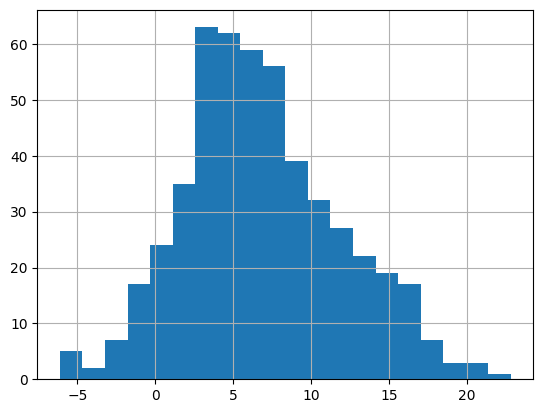

In [21]:
import matplotlib.pyplot as plt

# impot dem votes
dem_votes_potus_12_16 = pd.read_feather('dem_votes_potus_12_16.feather')

# new column - difference between 2012 and 2016
dem_votes_potus_12_16['diff'] = dem_votes_potus_12_16['dem_percent_12'] - dem_votes_potus_12_16['dem_percent_16']

sample_dem_data = dem_votes_potus_12_16.copy()

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff)

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print s_diff
print(s_diff)

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

In [26]:
#!pip install pingouin

import pingouin as pg

# Conduct a t-test on diff
test_results = pg.ttest(x=sample_dem_data['diff'], y=0, alternative = "two-sided")


                              
# Print the test results
print(test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


In [30]:
# Conduct a t-test on diff
test_results = pg.ttest(x=sample_dem_data['diff'], 
                              y=0, 
                              alternative="two-sided")
print(test_results)

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pg.ttest(x=sample_dem_data['dem_percent_12'], y = sample_dem_data['dem_percent_16'], paired = True, alternative = 'two-sided')



                              
# Print the paired test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  
                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


### ANOVA

* multiple distributions
* visualise sns.boxplot
* hypothesis test to see whether significant difference between groups

* `pingouin.anova(data=df, dv='col', between='groupcol')`
* pairwise tests
* `pingouin.pairwise_tests(data=df, dv='col', between='groupcol', padjust='none')`

* the more groups, the more tests
* the more tests, the more chance of false positive result
* `padjust correction`
  * `padjust='bonf'` bonferroni
  * `none` none (default)
  * `sidak` one-step Sidak
  * `holm` step-down method using Bonferroni adjustments
  * `fdr_bh` Benjamini/Hochberg FDR correction
  * `fdr_by` Benjamini/Yekutieli FDR correction


In [31]:
# load late shipments
late_shipments = pd.read_feather('late_shipments.feather')

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64
shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


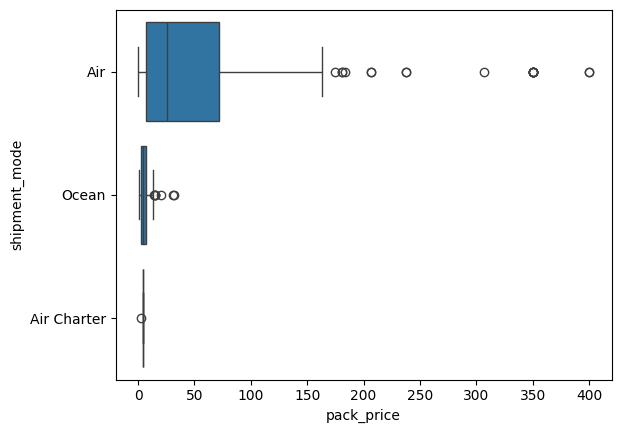

In [32]:
import seaborn as sns

# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()

# Print the grouped means
print(xbar_pack_by_mode)

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].std()

# Print the grouped standard deviations
print(s_pack_by_mode)

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(data=late_shipments, x='pack_price', y='shipment_mode')
plt.show()

In [33]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pg.anova(data=late_shipments, dv='pack_price', between='shipment_mode')



# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


In [34]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pg.pairwise_tests(data=late_shipments, dv='pack_price', between='shipment_mode') 

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [36]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pg.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


## Proportion Tests

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

late_shipments = pd.read_feather('late_shipments.feather')


In [3]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late']=='Yes').mean()

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1-p_0)/n)

# Calculate the test statistic
z_score = numerator/denominator

# Print the result
print(z_score)

# Calculate the p-value from the z-score
p_value = 1-norm.cdf(z_score, loc=0, scale=1)

# Print the p-value
print(p_value)

0.061 1000
0.13315591032282698
0.44703503936503364


### two-sample prop tests

stack overflow example - hobbyist = yes/no

H0: Proportion of hobbyist users is the same for those under 30 as those at least 30
H0: p>=30 - p<30 = 0

HA: Proportion of hobbyist users is different for those under 30 to those at least 30
HA: p>=30 - p<30 != 0

`alpha = 0.05`

z-score for proportion test: 

$z = (p_hat >=30 - p_hat < 30) - 0 / SE(p_hat>=30 - p_hat<30)$
Standard Error: 

SE(p_hat>=30 - p_hat<30) = sqrt(((p_hat x (1-p_hat))/n>=30 + (p_hat x (1-p_hat)/n<30)))
* p_hat is a weighted mean of p_hat>30 and p_hat<30
* p_hat = (n>= 30 * p_hat>=30 + n<30 * p_hat <30) / n>=30  n<30
* only require to calculate z-score: 
  * p_hat>= 30
  * p_hat<30
  * n>= 30
  * n<30

```python

p_hats = stack_overflow.groupby("age_cate")['hobbyist'].value_counts(normalize=True)
n = stack_overflow.groupby('age_cate')['hobbyist'].count()

p_hat_at_least_30 = p_hats[("At least 30", "Yes")]
p_hat_under_30 = p_hats[("Under 30", "Yes")]

n_at_least_30 = n["At least 30"]
n_under_30 = n["Under 30"]

p_hat = (n_at_least_30 * p_hat_at_least_30 + n_under_30 * p_hat_under_30) / (n_at_least_30 + n_under_30)

std_error = np.sqrt(p_hat * (1-p_hat) / n_at_least_30 + p_hat * (1-p_at) / n_under_30)

z_score = (p_hat_at_least_30 - p_hat_under_30) / std_error
```

```python

stack_overflow.groupby('age_cat')['hobbyist'].value_counts()

n_hobbyists = np.array([812, 1021]) # from above print group

n_rows = np.array([812 +238, 1021 + 190])

from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count=n_hobbyists, nobs = n_rows, alternative = "two-sided")
```

In [28]:
# p_hats
p_hats = late_shipments.groupby('freight_cost_groups')['late'].apply(lambda x: (x == 'Yes').mean())
print(p_hats)

ns = late_shipments.groupby('freight_cost_groups')['freight_cost_groups'].value_counts()
print(ns)

#missing_values = late_shipments['freight_cost_groups'].isna().sum()
#print(missing_values)

freight_cost_groups
expensive     0.079096
reasonable    0.035165
Name: late, dtype: float64
freight_cost_groups
expensive     531
reasonable    455
Name: count, dtype: int64


In [33]:
# Calculate the pooled estimate of the population proportion
p_hat = (ns['expensive'] * p_hats["expensive"] + ns['reasonable'] * p_hats["reasonable"]) / (ns['expensive'] + ns['reasonable'])

# Print the result
print(p_hat)

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1-p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat/ ns['expensive'] + p_hat_times_not_p_hat / ns['reasonable']

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Print the result
print(std_error)

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats['reasonable']) / std_error

# Print z_score
print(z_score)

# Calculate the p-value
p_value = 1-norm.cdf(z_score, loc=0, scale=1)

# Print the p-value
print(p_value)

0.058823529411764705
0.015031300895066685
2.922648567784529
0.0017353400023595311


In [35]:
from statsmodels.stats.proportion import proportions_ztest

# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby('freight_cost_groups')['late'].value_counts()

# Print the counts
print(late_by_freight_cost_group)

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: count, dtype: int64


In [37]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([42, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([489+42, 439+16])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count = success_counts, nobs = n, alternative = 'larger')


# Print the results
print(stat, p_value)

2.922648567784529 0.001735340002359578


### chi-square test of independence

* ANOVA extends t-tests to more than two groups
* chi-square extends the proportion test of independence to more than two groups

**Statistical independence** - proportion of successes in the response variable is the same across all categories of the explanatory variable

**Test for independence of variables**

```python
import pingouin
# correction is Yates continuity correction
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='hobbyist' y='age_cat', correction = False)

print(stats)

```

Example: 

H0: Age categories are independent of job satisfaction levels
H1: Age categories are not independent of job satisfaction levels

`alpha = 0.1`

* test statistic denoted chi^2
* assuming independence, how far away are the observed results from the expected values? 

**EDA with proportional stacked bar plot**

```python
props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind='bar', stacked = True)

# is observed difference statistally significant?  are they independent?

import pingouin
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='job_sat', y='age_cat')
print(stats)

#pvlaue is above 0.1 so we conclude that age categories are independent - fail to reject null hypo


```

If we swap variables (explanatory, response) we get the same chi-square results so the relationship question is phrased: 

* Are the variables X and Y independent?  (not is one independent from the other)
* chi-square are almost always right-tailed tests

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

late_shipments = pd.read_feather('late_shipments.feather')

The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

EXW: "Ex works". The buyer pays for transportation of the goods.
CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
FCA: "Free carrier". The seller pays for transportation of the goods.
Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.

H0: vendor_inco_term and freight_cost_group are independent.

HA: vendor_inco_term and freight_cost_group are associated.

vendor_inco_term  freight_cost_groups
CIP               reasonable             0.680000
                  expensive              0.320000
DDP               expensive              0.550000
                  reasonable             0.450000
EXW               expensive              0.583448
                  reasonable             0.416552
FCA               reasonable             0.663636
                  expensive              0.336364
Name: proportion, dtype: float64
freight_cost_groups  expensive  reasonable
vendor_inco_term                          
CIP                   0.320000    0.680000
DDP                   0.550000    0.450000
EXW                   0.583448    0.416552
FCA                   0.336364    0.663636


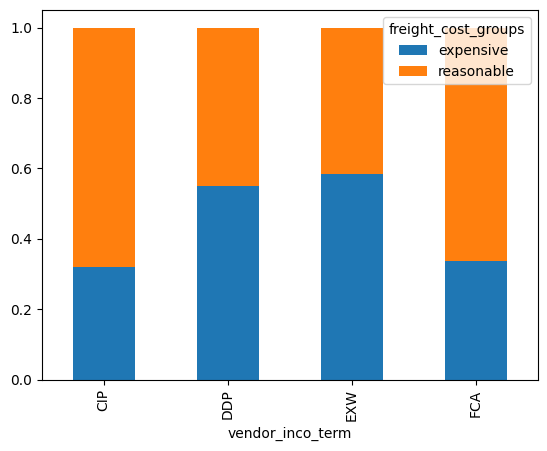

In [3]:
#!pip install pingouin
import pingouin

late_shipments2 = late_shipments[late_shipments['vendor_inco_term'] != 'DDU']

# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments2.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Print props
print(props)

# Convert props to wide format
wide_props = props.unstack()

# Print wide_props
print(wide_props)

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind='bar', stacked=True)
plt.show()

In [4]:
# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments2, x='vendor_inco_term', y='freight_cost_groups')

# Print results
print(stats[stats['test'] == 'pearson']) 

      test  lambda     chi2  dof          pval    cramer     power
0  pearson     1.0  33.6426  3.0  2.357026e-07  0.183511  0.999424


### chi-square goodness of fit tests

* compare single categorical variable to a hypothesised distribution

* question: how do you feel when you discover that you've already visited the top resource?

```python
purple_link_counts = stack_overflow['purple_link'].value_counts()
purple_link_counts = purple_link_counts.rename_axis('purple_link').reset_index(name='n').sort_values('purple_link')

hypothesized = pd.DataFrame({
    'purple_link': ['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'],
    'prop': [1/6, 1/6, 1/2, 1/6]
})

# H0 = sample matches hypothesized distro
# HA = sample does not match hypothesized distro
# x2 (chi) measures how far observed results are from expectations in each group

alpha = 0.01

n_total = len(stack_overflow)
hypothesized['n'] = hypothesized['prop'] * n_total

plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'], color = 'red', label = 'Observed')
plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha = 0.5, color = 'blue', label = 'Hypothesized')

plt.legend()
plt.show()


print(hypothesized)

from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts['n'], f_exp = hypothesized['n'])

# conclude sample distribution is different from hypothesied because pvalue is very small
```

Visualizing goodness of fit
The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

Recall the vendor incoterms in the late_shipments dataset. You hypothesize that the four values occur with these frequencies in the population of shipments.

CIP: 0.05
DDP: 0.1
EXW: 0.75
FCA: 0.1
These frequencies are stored in the hypothesized DataFrame.

The incoterm_counts DataFrame stores the .value_counts() of the vendor_inco_term column.



  vendor_inco_term    n
3              CIP   56
2              DDP  100
0              EXW  732
1              FCA  111
  vendor_inco_term  prop
0              CIP  0.05
1              DDP  0.10
2              EXW  0.75
3              FCA  0.10
999
  vendor_inco_term  prop       n
0              CIP  0.05   49.95
1              DDP  0.10   99.90
2              EXW  0.75  749.25
3              FCA  0.10   99.90


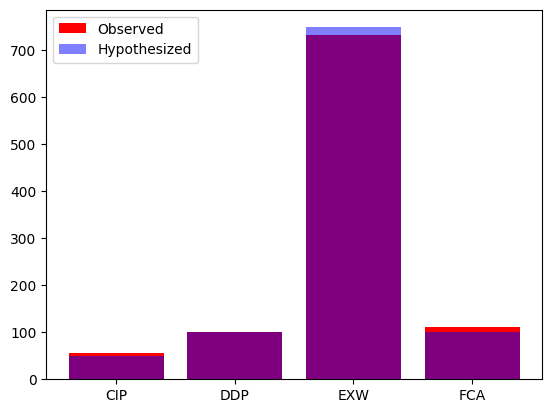

In [13]:
# create incoterm_counts
incoterm_counts = late_shipments2['vendor_inco_term'].value_counts()
incoterm_counts = incoterm_counts.rename_axis('vendor_inco_term').reset_index(name='n').sort_values('vendor_inco_term')

print(incoterm_counts)

hypothesized = pd.DataFrame({
    'vendor_inco_term': ['CIP', 'DDP', 'EXW', 'FCA'],
    'prop': [0.05, 0.1, 0.75, 0.1]
})

print(hypothesized)
# Find the number of rows in late_shipments
n_total = len(late_shipments2)

# Print n_total
print(n_total)

# Create n column that is prop column * n_total
hypothesized['n'] = hypothesized['prop'] * n_total

# Print the modified hypothesized DataFrame
print(hypothesized)

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], color='blue', alpha = 0.5, label="Hypothesized")
plt.legend()
plt.show()



Performing a goodness of fit test
The bar plot of vendor_inco_term suggests that the distribution across the four categories was quite close to the hypothesized distribution. You'll need to perform a chi-square goodness of fit test to see whether the differences are statistically significant.

Recall the hypotheses for this type of test:

H0: The sample matches with the hypothesized distribution.

HA: The sample does not match with the hypothesized distribution.

To decide which hypothesis to choose, we'll set a significance level of 0.1.

In [14]:
from scipy.stats import chisquare
# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs=incoterm_counts['n'], f_exp = hypothesized['n'])


# Print gof_test results
print(gof_test)

Power_divergenceResult(statistic=2.3633633633633613, pvalue=0.5004909543758689)


Fail to reject H0 - so sample matches hypothesized distribution

## Non-parametric tests

* above tests make assumptions about data

**Randomness**
* samples are random subsets of larger populations
  * consequence: sample not representative of population
**Independence**
* each observation (row) in the dataset is independent
  * consequence: increased chance of false negative/positive errors
**large sample size**
* sample size big enough to mitigate uncertainty so that *Central Limit Theorem* applies, and distribution is normal
  * consequence: wider confidence intervals, increased chance of false negative/positive errors
  * t-test: 
    * one sample: at least 30 observations in the sample 
    * two samples: at least 30 observations in each sample
    * paired samples: at least 30 pairs of observations across sample
    * ANOVA: at least 30 observations in each sample
  * proportion test: 
    * one sample: at least 10 successes in sample; at least 10 failures 
    * two samples: at least 10 successes in each sample; at least 10 failures
  * chi-square test:
    * number of successes greater than or equal to 5
    * number of failures greater than or equal to 5

**sanity check** if bootstrap distribution doesn't look normal, assumptions are likely not valid
* revisit data collection for randomness, independence, sample size

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

late_shipments = pd.read_feather('late_shipments.feather')
late_shipments2 = late_shipments[late_shipments['vendor_inco_term'] != 'DDU']

In [4]:
# count freight_cost_groups values
counts = late_shipments2['freight_cost_groups'].value_counts()

# Print counts
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())


freight_cost_groups
expensive     531
reasonable    454
Name: count, dtype: int64
True


In [6]:
# Count the late values
counts = late_shipments2['late'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

late
No     938
Yes     61
Name: count, dtype: int64
True


In [7]:
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments2.groupby('vendor_inco_term')['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: count, dtype: int64
True


In [8]:
# Count the shipment_mode values
counts = late_shipments2['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

shipment_mode
Air            905
Ocean           88
Air Charter      6
Name: count, dtype: int64
False


### non-parametric tests

parametric tests: z-test, t-test, ANOVA - all assume normal distribution and large sample size for CLT

**non-parametric tests** avoid parametric assumptions and conditions.  many non-parametric tests use *ranks* of data:
`from scipy.stats imort rankdata`

* are more reliable for **small sample sizes** and when data is **not normally distributed**
* **Wilcoxon-signed rank test** works on ranked absolute differences between pairs of data
* Step 1:
  * take differences in paired values
* Step 2: 
  * take absolute differences between paired values
* Step 3: 
  * rank the abs differences
* Step 4: 
  * rank differences
  * calculate statistic `W` by using signs of diff column to split the ranks into two groups - one for positive differences, one for negative differences
  * `W` is the smaller of the sums of signs (positive and negative)

Using `pingouin.Wilcoxon`

```python
import pingouin
alpha = 0.01
pingouin.wilcoxon(x, y, alternative = 'less')

```

In [9]:
import pingouin

# import sample dem data
sample_dem_data = pd.read_feather('dem_votes_potus_12_16.feather')

# paired t-test
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], y=sample_dem_data['dem_percent_16'], paired=True, alternative='two-sided')

# print paired test results
print(paired_test_results)


                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


In [10]:
# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data['dem_percent_12'], y = sample_dem_data['dem_percent_16'], alternative = 'two-sided')

# Print Wilcoxon test results
print(wilcoxon_test_results)

           W-val alternative         p-val       RBC      CLES
Wilcoxon  2401.0   two-sided  1.780396e-77  0.961661  0.644816


### non-parametric ANOVA and unpaired t-tests

* **Wilcoxon-Mann-Whitney test**
  * aka Mann Whitney U test
  * a t-test on the ranks of the numeric input
  * works on unpaired data

```python

age_vs_comp = stack_overflow[['converted_comp', 'age_first_code_cut']]
age_vs_comp_wide = age_vs_comp.pivot(columns = 'age_first_code_cut', values = 'converted_comp')

alpha = 0.01

pingouin.mwu(x=age_vs_comp_wide['child'], y = age_vs_comp_wide['adult'], alternative='greater')

```

* **Kruskal-Wallis test**
  * extends Wilcoxon-Mann-Whitney to more than two groups (in the same way that ANOVA extends t-tests)

```python

pingouin.kruskal(data=stack_overflow, dv= 'converted_comp', between = 'job_sat')
```

In [11]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms', 'late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['Yes'], y = weight_vs_late_wide['No'], alternative = 'two-sided')



# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  38145.0   two-sided  0.000014 -0.331902  0.665951


In [12]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments, dv='weight_kilograms', between='shipment_mode')



# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28
